# Homwork 2
**Name:**  [Xian Liu]


$$x_n = $$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problems

1\. _[4 pts]_ Do question 2.57 of PRML. 
* For practice, try to solve 2.56 first (do not submit your answers to that one).
* _ **2.57(\*)**  Verify that the multivariate gaussian distributions ca be cast in exponential family form (2.194) and derive expressions for $\boldsymbol{\eta}$, $\mathbf{u}(\mathbf{x})$, $h(\mathbf{x})$, and $g(\boldsymbol{\eta})$ analogous to (2.220)-(2.223)_

**Please see attached.**

 2\. _[4 pts]_ Reproduce figure 2.8. 
 * Your Gaussian's do not have to be identical, but the covariance matrices should be 
     (a) general [not diagonal or isometric], 
     (b) diagonal, and 
     (c) proportional to the identity matrix. 

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

In [3]:
mean = [0,0]
cov1 = [[3.0, 1.0],
        [2.0, 2.0]]
cov2 = [[3.0, 0.0], 
        [0.0, 1.0]]
cov3 = [[1.0, 0.0], 
        [0.0, 1.0]]
covs = [cov1, cov2, cov3]

In [4]:
X, Y = mgrid[-4:4:100j, -4:4:100j]
pos = np.column_stack((X.flatten(), Y.flatten()))

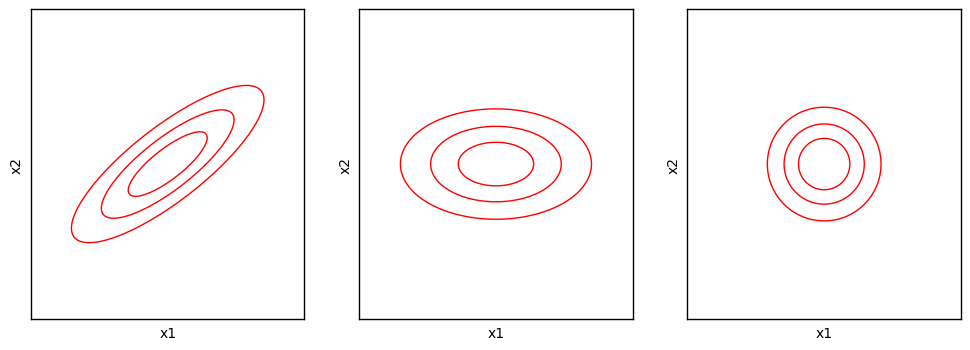

In [5]:
fig, axes = subplots(1, 3, figsize=(12,4))
for idx in range(3):
    sca(axes[idx])
    Z = multivariate_normal.pdf(pos, mean=mean, cov=covs[idx]).reshape(X.shape)
    contour(X, Y, Z, 3, colors='r')
    axis('equal')
    xlabel('x1')
    ylabel('x2')
    plt.tick_params(axis='both', which='major', bottom='off', top='off', left='off', right='off',
                    labelbottom='off', labelleft='off')

plt.show()

3\.  _[4 points]_ Reproduce figure 2.21. 
* The _old faithful_ data is describe in appendix A, you should be able to download it and open it.
* You can (and, for now, you should) use a function from `sklearn` in order to fit a mixture of Gaussians to your data. I beleive you can find what you need [here](http://scikit-learn.org/stable/modules/mixture.html)

**NOTE:** In order to help you out, I will get you started by downloading the data and plotting it

In [6]:
# Download the data
from urllib2 import urlopen
path = 'faithful.txt'
remote = urlopen('https://raw.githubusercontent.com/aidiary/PRML/master/ch9/faithful.txt')
with open('faithful.txt', 'w') as f:
    f.write(remote.read())

In [7]:
# Read it in and inspect it
import pandas
from IPython.display import display
old_faithful = pandas.read_csv(path, sep=' ', names=['duration', 'time-to-next'])
# display(old_faithful)

In [8]:
# Plot the data --> note that I convert from a DataFrame to an array 
figsize(6,6)
data = array(old_faithful)
# scatter(data[:,0], data[:,1], color='lightgreen')

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
def gaussian_mixture_plot(n_components):
    clf = GaussianMixture(n_components=n_components)
    clf.fit(data)
    X, Y = mgrid[1:6:100j, 40:100:100j]
    pos = np.column_stack((X.flatten(), Y.flatten()))
    Z = np.exp(clf.score_samples(pos)).reshape(X.shape)
    scatter(data[:,0], data[:,1], color='lightgreen')
    contour(X, Y, Z, 4, levels=np.linspace(Z.min(), Z.max(), 5), colors='r')
    xlim((1,6))
    ylim((40,100))

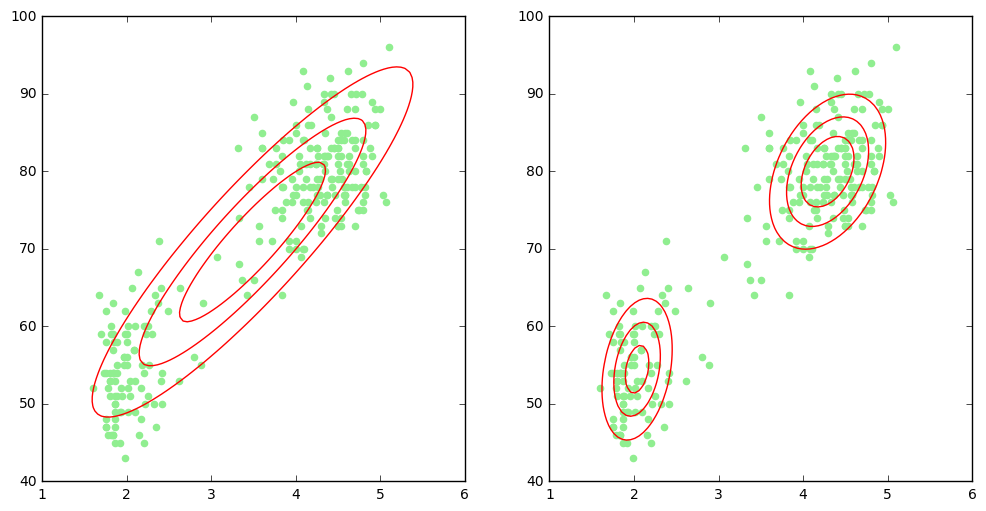

In [11]:
figsize(12,6)
subplot(1,2,1)
gaussian_mixture_plot(1)
subplot(1,2,2)
gaussian_mixture_plot(2)